# Clustering Analysis

### 1. Import Libraries and Dataset
### 2. Analyze and Prep Dataset
### 3. The Elbow Technique
### 4. k-means Clustering
### 5. Export Clustering Data

## Import Libraries and Datasets

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook
%matplotlib inline

Import Datasets

In [3]:
path = r'C:\Users\kacee\OneDrive\Desktop\Project6'

In [4]:
# Importing Merged data
df_m= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Geospatial_Complete_Data.csv'), index_col = False)

## Analyze and Prep Dataset

In [5]:
df_m.shape

(720, 12)

In [6]:
df_m.head()

,Unnamed: 0,Year,State,House Cost,Income,State_Minimum_Wage,House Category,Income Category,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly
0,0,2008,AL,137250.036361,44480.0,5.85,Low Median Price,Low Income,3.085657,11.279589,32.408006,12168.0
1,1,2008,AR,114877.181812,39590.0,6.25,Low Median Price,Low Income,2.901672,8.836706,34.462893,13000.0
2,2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price,Low Income,4.304473,14.069316,23.231649,14352.0
3,3,2008,CA,336043.181811,57010.0,8.00,High Median Price,Middle Income,5.894460,20.194903,16.965082,16640.0
4,4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price,Middle Income,3.780757,15.779048,26.449727,14601.6


In [7]:
df_m = df_m.drop(columns =['Unnamed: 0'])

In [8]:
df_m.shape

(720, 11)

In [9]:
df_m.head()

,Year,State,House Cost,Income,State_Minimum_Wage,House Category,Income Category,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly
0,2008,AL,137250.036361,44480.0,5.85,Low Median Price,Low Income,3.085657,11.279589,32.408006,12168.0
1,2008,AR,114877.181812,39590.0,6.25,Low Median Price,Low Income,2.901672,8.836706,34.462893,13000.0
2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price,Low Income,4.304473,14.069316,23.231649,14352.0
3,2008,CA,336043.181811,57010.0,8.00,High Median Price,Middle Income,5.894460,20.194903,16.965082,16640.0
4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price,Middle Income,3.780757,15.779048,26.449727,14601.6


In [10]:
df_m.columns

Index(['Year', 'State', 'House Cost', 'Income', 'State_Minimum_Wage',
       'House Category', 'Income Category', 'Multiplied_Income',
       'Multiplied_Wage', 'Income_Percentage', 'Minimum_Wage_Yearly'],
      dtype='object')

In [11]:
#Drop all columns that are not quantitative
df = df_m.drop(columns =['State', 'Year', 'House Category', 'Income Category'])

In [12]:
df.head()

,House Cost,Income,State_Minimum_Wage,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly
0,137250.036361,44480.0,5.85,3.085657,11.279589,32.408006,12168.0
1,114877.181812,39590.0,6.25,2.901672,8.836706,34.462893,13000.0
2,201922.818171,46910.0,6.90,4.304473,14.069316,23.231649,14352.0
3,336043.181811,57010.0,8.00,5.894460,20.194903,16.965082,16640.0
4,230399.352287,60940.0,7.02,3.780757,15.779048,26.449727,14601.6


In [13]:
df.columns

Index(['House Cost', 'Income', 'State_Minimum_Wage', 'Multiplied_Income',
       'Multiplied_Wage', 'Income_Percentage', 'Minimum_Wage_Yearly'],
      dtype='object')

## The Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-5836288811827.488,
 -2306858012262.226,
 -1110910588561.334,
 -696661132322.1294,
 -482491069030.4696,
 -373517201104.8068,
 -290652358929.6531,
 -239565023475.91254,
 -197591992580.7269]

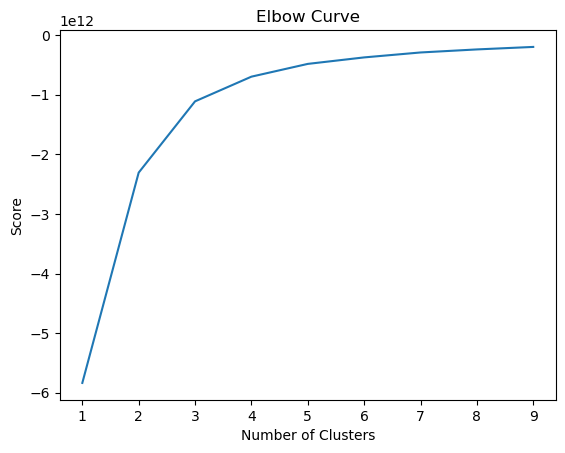

In [16]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to three on the x-axis, and after that the curve straightens out. This means that the optimal count for clusters is three. 4 Could also be acceptable.

## k-means Clustering

In [17]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data
kmeans.fit(df)

C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [20]:
df.head()

,House Cost,Income,State_Minimum_Wage,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly,clusters
0,137250.036361,44480.0,5.85,3.085657,11.279589,32.408006,12168.0,0
1,114877.181812,39590.0,6.25,2.901672,8.836706,34.462893,13000.0,0
2,201922.818171,46910.0,6.90,4.304473,14.069316,23.231649,14352.0,2
3,336043.181811,57010.0,8.00,5.894460,20.194903,16.965082,16640.0,1
4,230399.352287,60940.0,7.02,3.780757,15.779048,26.449727,14601.6,2


In [21]:
df['clusters'].value_counts()

clusters
0    393
2    269
1     58
Name: count, dtype: int64

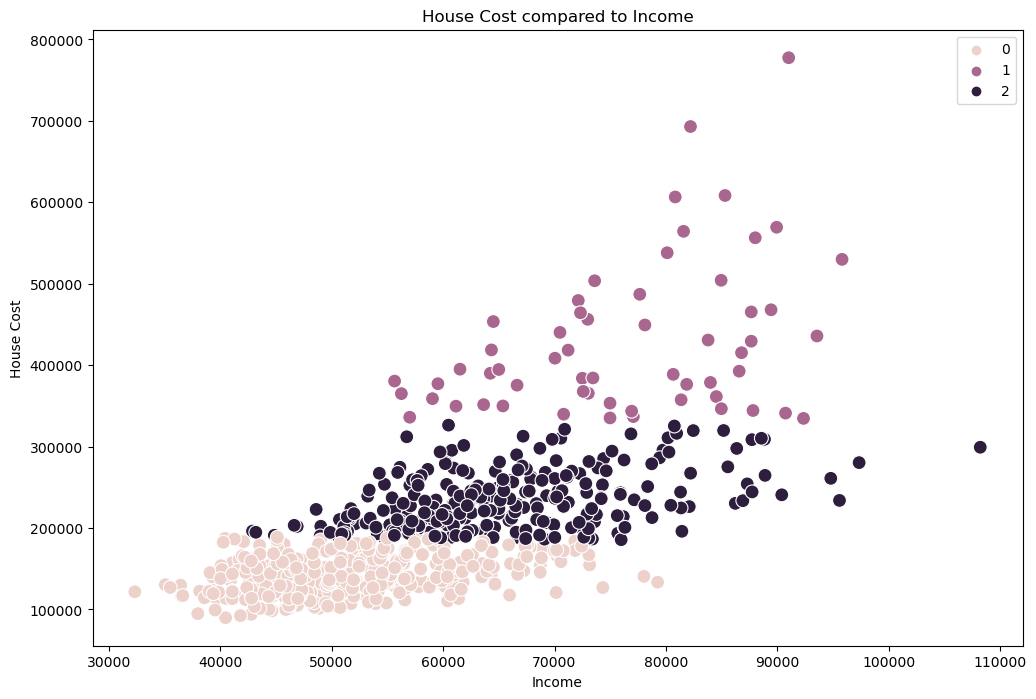

In [22]:
# Plot the clusters for Income and House Cost
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Income'], y=df['House Cost'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Income')
plt.ylabel('House Cost') 
plt.title('House Cost compared to Income')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'k_IvH.png'), bbox_inches='tight')
plt.show()

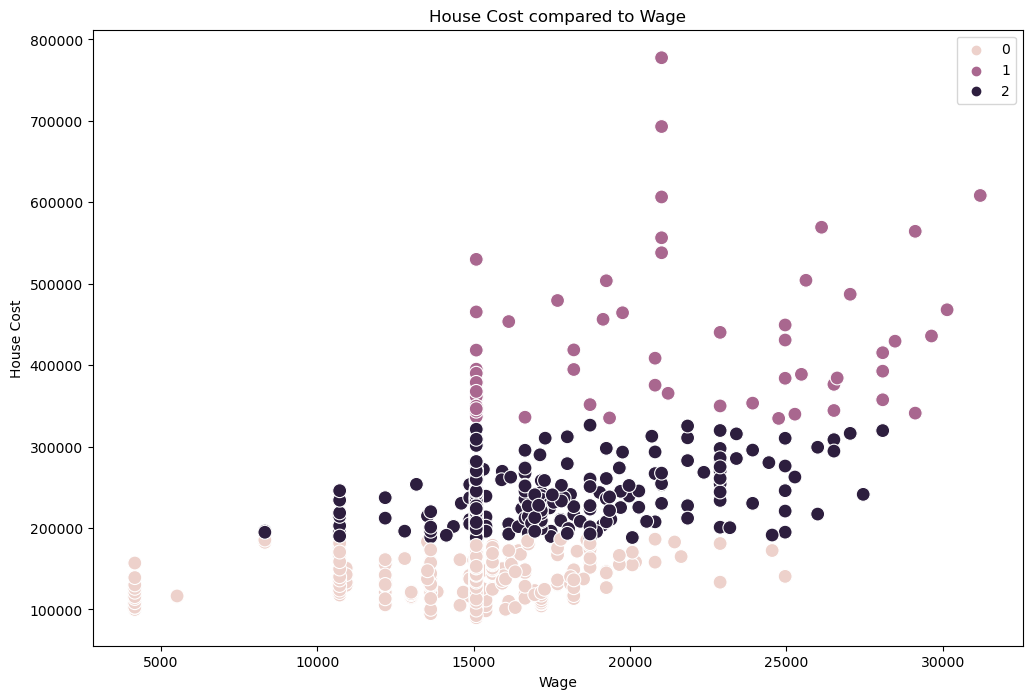

In [23]:
# Plot the clusters for Wage and House Cost
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Minimum_Wage_Yearly'], y=df['House Cost'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Wage') 
plt.ylabel('House Cost') 
plt.title('House Cost compared to Wage')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'k_WvH.png'), bbox_inches='tight')
plt.show()

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df.groupby('cluster').agg({'Income':['mean', 'median'], 
                         'House Cost':['mean', 'median'], 
                           'Minimum_Wage_Yearly':['mean', 'median']
                        })

Income              House Cost                 \
                     mean   median           mean         median   
cluster                                                            
dark purple  65544.237918  64190.0  233823.497226  227383.351856   
pink         51519.592875  50220.0  141434.092565  140712.363646   
purple       76416.724138  76995.0  428060.220991  393642.393760   

            Minimum_Wage_Yearly           
                           mean   median  
cluster                                   
dark purple        17190.774721  16432.0  
pink               14733.280407  15080.0  
purple             21252.220690  21008.0

## Export Clustering Dataset

In [26]:
# Export Merged Dataset
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Clustering_Integer_Dataset.csv'))

### Reflections

The clustering with k-means does not give a lot of insight with the different variables that were tested. This may be due to the smaller size of the dataset. As we explore this data more, it will be interesting to find ways in which using a k-means clustering will give more insight.

### Hypothesis:

The average cost of houses in the US has increased at a greater rate than the average household income from 2008-2022.